# Assignment 3: Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Contributors:
### Lukas Andersson - XX Hours
### Ramapriya Navalpakkam - XX Hours

## 1.

### a.

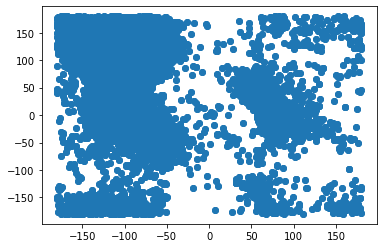

In [2]:
x = []
y = []

df = pd.read_csv('../data/data_all.csv')

for index, row in df.iterrows():
    x.append(row['phi'])
    y.append(row['psi'])

plt.plot(x, y, 'o')

model = np.polyfit(x, y, 1)
predict = np.poly1d(model)

x_lin_reg = np.linspace(60.0, 200.0, num=49)
y_lin_reg = predict(x_lin_reg)

plt.scatter(x, y);

### b.


Not sure if the heatmap is the way I have done it below  
COMMENT: We need to use "Bucketing" to group the values for a more visually pleasing answer, more info in one of the discussion threads

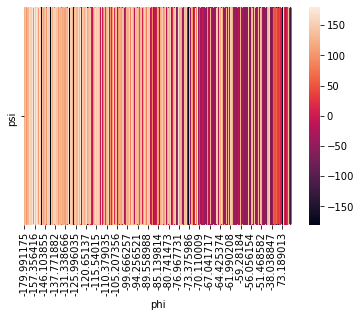

In [3]:
heat_map_data = pd.DataFrame({
    'phi' : x,
    'psi' : y
})

heatmap1_data = pd.pivot_table(heat_map_data, values='psi',
                     columns='phi')
ax = sns.heatmap(heatmap1_data)

## 2.

### a.
Below we see that the elbow point is 3. Which is the appropriate value for k.

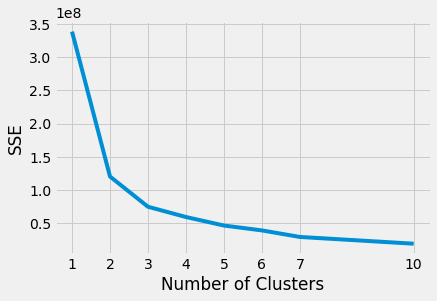

In [4]:
k = [1,2,3,4,5,6,7,10]

sse = []
for i in k :
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(heat_map_data)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(k, sse)
plt.xticks(k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### b.

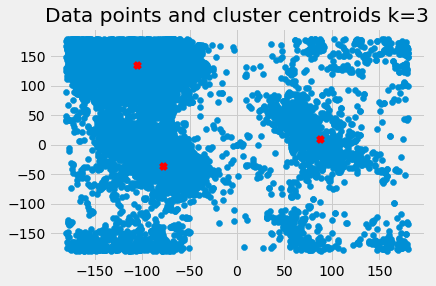

In [5]:
plt.scatter(x, y);
kmeans_chosen = KMeans(n_clusters=3, random_state=0).fit(heat_map_data)
plt.scatter(kmeans_chosen.cluster_centers_[:, 0], kmeans_chosen.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids k=3')
plt.show()


### c.

## 3.

### a.  

Estimated number of noise points: 1286


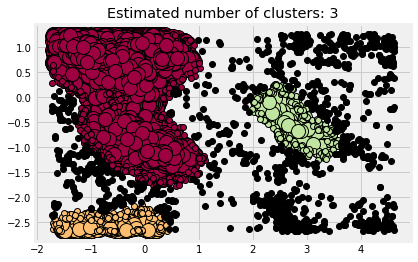

In [6]:
X = np.column_stack((x,y))
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=75).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of noise points: %d' % n_noise_)

%matplotlib inline

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### i.  
  
We chose the minimum nulber of samples in the neighbourhood for a point to be considered as a core point to be 75. We did some testing to figure out what was reasonable, we did not want too little since there are so many points in this data, almost 30 000. If we have it smaller it quickly becomes a lot of clusters since the data is so spread, this has the effect of creating noise instead of including the points in a cluster, but since our total amount of noise is about 4% of the total data we think its reasonable.

### ii.  
  
Very similiar reasoning to amount of neighbours. We cant have too large epsilon since the data is so spread, increasing the epsilon just a little bit creates a lot of clusters in random spots that just barely reach the requirement, 0.2 seems to be the ideal value if you dont want loads of random small clusters everywhere between the clusters we now have.

### b.  
In K-means two of the three cores are chosen inside the top left cluster. In DBSCAN it made the whole topleft one big cluster instead, while it created the third cluster in the bottom left, which seems to be excluded entierly in K-means when just using 3 cores. They do have the same amount of cores however.

### c.  
DBSCAN is very fragile when it comes to theese variables, just small changes can quickly create a lot more clusters, especially in this dataset since we have so much data, almost 30 000 points. It took some testing to end up with this result and it also seems like there has to be a really good balance between the two, so both variables are quite fragile. However, as mentioned, It's extremely fragile in this example because of the amount of data and the fact that its spread everywhere. If there was data with less noise and less spread out it would not be that fragile, there is always noise though so that perfect scenario wont really happen.

## 4.

### a.

### b.